# CHƯƠNG 4: HỌC KHÔNG GIÁM SÁT - UNSUPERVISED LEARNING
---
Giảng viên: Đặng Văn Nam

Email: dangvannam080508humg@gmail.com

---
Nếu dữ liệu huấn luyện chỉ bao gồm các dữ liệu đầu vào x mà không có đầu ra tương ứng. Các thuật toán machine learning có thể không dự đoán được đầu ra nhưng vẫn trích xuất được những thông tin quan trọng dựa trên mối liên quan giữa các điểm dữ liệu. Các thuật toán trong nhóm này được gọi là học không giám sát (unsupervised learning).

* Học máy có giám sát (Supervised learning): Dự đoán đầu ra (label) của một dữ liệu mới (new sample) dựa trên các cặp (sample, label) đã biết từ trước.
* Học máy không giám sát (Unsupervised learning): chỉ có dữ liệu đầu vào (sample) mà không có nhãn (label).

<img src='pic/pic1.jpg' width='700px'>

– Mục đích là khai phá dữ liệu để tìm ra các cấu trúc nội tại trong dữ liệu để thực hiện một công việc nào đó, ví dụ như phân nhóm (clustering) hoặc giảm số chiều của dữ liệu (dimension reduction) để thuận tiện trong việc lưu trữ và tính toán.


## Phân cụm khách hàng (Customer Segmentation) với KMeans
---

Từ tập dữ liệu thông tin của 200 khách hàng của trung tâm thương mại phân chia các khách hàng đấy vào những phân khúc (cụm) khách hàng phù hợp

File dữ liệu sử dụng:

**Mall_Custemers.csv**: Tập dữ liệu gồm 200 khách hàng với một số thuộc tính:
1. Gender: Giới tính của khách hàng
2. Age: Tuổi của khách hàng
3. Income: Thu nhập hàng năm của khách hàng (k$)
4. Spending score: Điểm chi tiêu do trung tâm mua sắm chỉ định dựa trên hành vi chi tiêu của khách hàng với thang điểm từ 1-100

# 1.Tải và quan sát tập dữ liệu

In [1]:
# Khai báo thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc tập dữ liệu
path = "data/Mall_Customers.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 1.1 Quan sát thuộc tính tuổi của khách hàng
---
Lập biểu đồ quan sát sự phân bổ tuổi của khách hàng

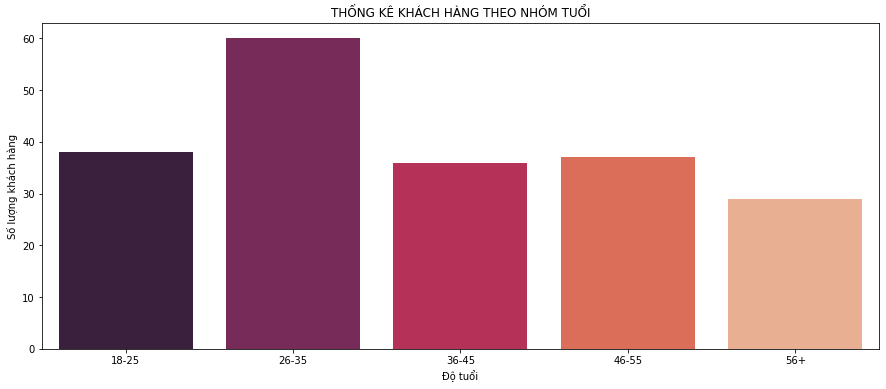

['18-25', '26-35', '36-45', '46-55', '56+']
[38, 60, 36, 37, 29]


In [7]:
#Vẽ biểu đồ cột quan sát khách hàng theo từng nhóm tuổi

age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","56+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("THỐNG KÊ KHÁCH HÀNG THEO NHÓM TUỔI")
plt.xlabel("Độ tuổi")
plt.ylabel("Số lượng khách hàng")
plt.show()

print(x)
print(y)

Độ tuổi của khách hàng tối thiểu là 18, tối đa là 30, tuổi trung bình là 38,85 và độ tuổi chủ yếu là từ 26 - 35 tuổi

## 1.2 Quan sát thuộc tính thu nhập hàng năm của khách hàng
---
Vẽ biểu đồ hộp và biểu đồ cột để thấy sự phân bố thu nhập hàng năm của khách hàng

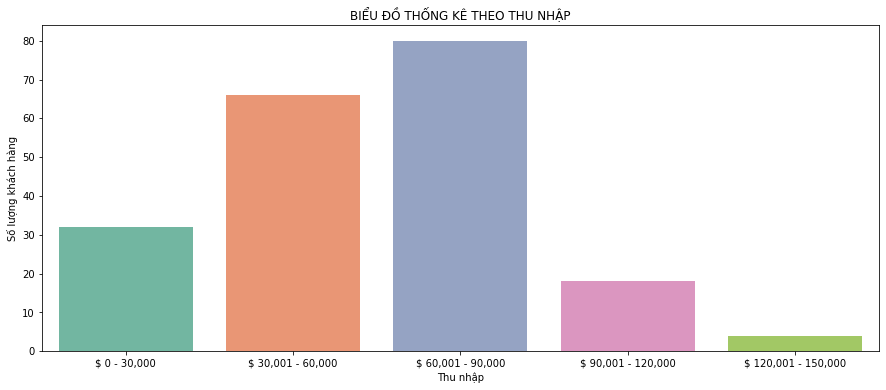

['$ 0 - 30,000', '$ 30,001 - 60,000', '$ 60,001 - 90,000', '$ 90,001 - 120,000', '$ 120,001 - 150,000']
[32, 66, 80, 18, 4]


In [8]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("BIỂU ĐỒ THỐNG KÊ THEO THU NHẬP")
plt.xlabel("Thu nhập")
plt.ylabel("Số lượng khách hàng")
plt.show()
print(aix)
print(aiy)

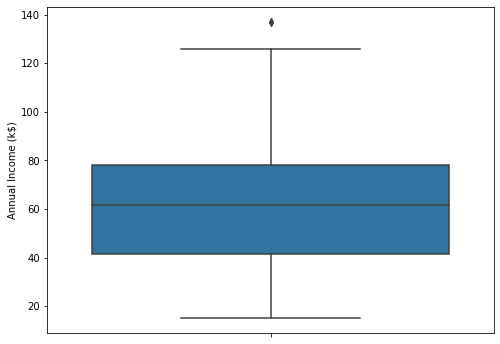

In [9]:
#Kiểm tra ngoại lai
plt.figure(figsize=(8,6))
plt.subplot()
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

Như vậy thu nhập hàng năm của khách hàng phần lớn trong khoảng từ 60000 - 90000. Thu nhập thấp nhất là 15000 và cao nhất là 137000 trung bình là 60560

## 1.3 Quan sát thuộc tính điểm chi tiêu của khách hàng
---
* Thuộc tính điểm chi tiêu của khách hàng được tính dựa trên hành vi mua sắm tại trung tâm trên thang điểm 1-100.

* Thuộc tính này cho biết khả năng chi tiêu cho các mặt hàng của trung tâm thương mại. Điểm chi tiêu càng cao khách hàng càng tiêu nhiều tiền vào việc mua sắm ở trung tâm thương mại.

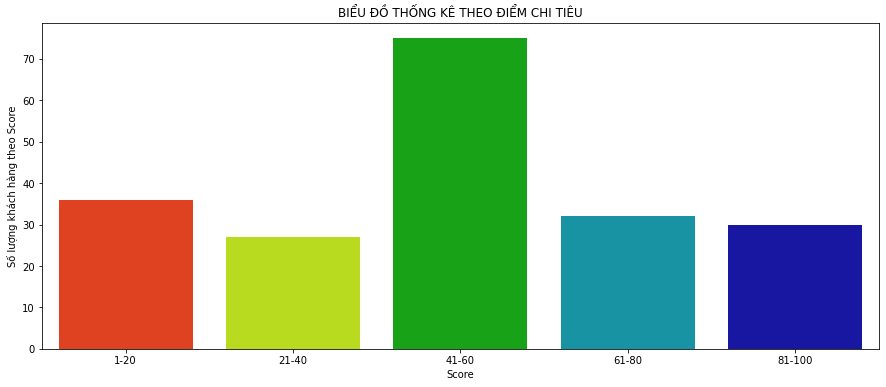

['1-20', '21-40', '41-60', '61-80', '81-100']
[36, 27, 75, 32, 30]


In [10]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("BIỂU ĐỒ THỐNG KÊ THEO ĐIỂM CHI TIÊU")
plt.xlabel("Score")
plt.ylabel("Số lượng khách hàng theo Score")
plt.show()
print(ssx)
print(ssy)

Như vậy điểm chi tiêu của khách hàng phần lớn trong khoảng từ 41-60 điểm. Điểm thấp nhất là 1 và cao nhất là 99 trung bình là 50,2

## 1.4 Quan sát thuộc tính giới tính
---

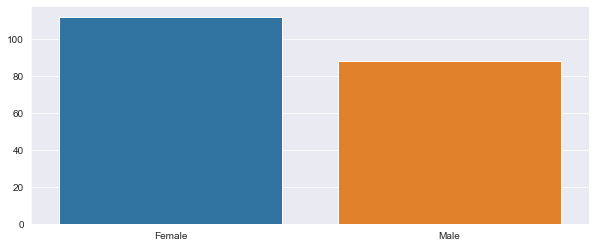

Female    112
Male       88
Name: Gender, dtype: int64


In [11]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()
print(genders)

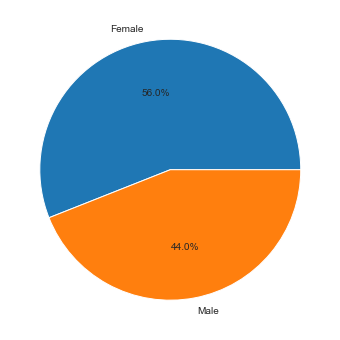

In [12]:
plt.figure(figsize=(8,6))
plt.subplot()
plt.pie(genders.values,labels=genders.index,autopct='%1.1f%%')
plt.show()

Khách hàng là nữ giới đông hơn nam giới. Nữ giới chiếm 56% và nam giới là 44%

# 2.Tiến hành phân cụm tập dữ liệu

## 2.1 Sử dụng phương pháp khửu tay tìm số cụm tối ưu

In [ ]:
#Sử dụng 3 thuộc tính Age, Income, Score để phân cụm dữ liệu

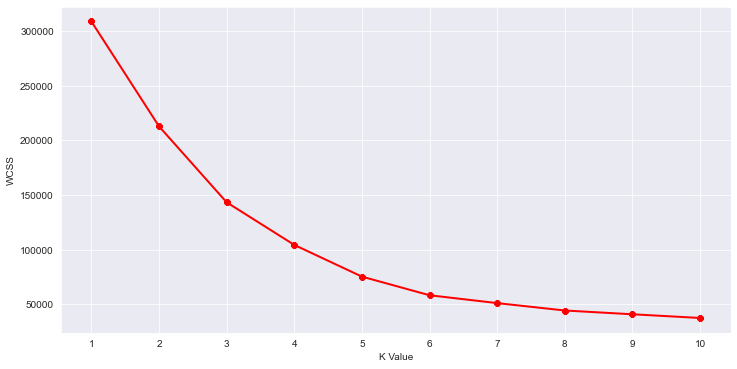

In [13]:
from sklearn.cluster import KMeans
wcss = []
#Thử số cụm (n_clusters) thay đổi từ 1 đến 10
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df.iloc[:,2:])
    wcss.append(kmeans.inertia_)

#Trực quan hóa lên biểu đồ:
plt.figure(figsize=(12,6))    
plt.grid(True)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Từ biểu đồ trên theo phương pháp khửu tay ta thấy số lượng cụm n = 5 tốt nhất

## 2.2 Tiến hành phân cụm dữ liệu theo số lượng cụm phía trên

Với k=5. Phân chia tập dữ liệu thành 5 cụm

In [14]:
#Thực hiện phân thành 5 cụm
km = KMeans(n_clusters=5,init="k-means++",n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan')
km.fit_predict(df.iloc[:,2:])

#Tạo cột Cluster để cho biết mẫu thuộc cụm nào
df["Cluster"] = km.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


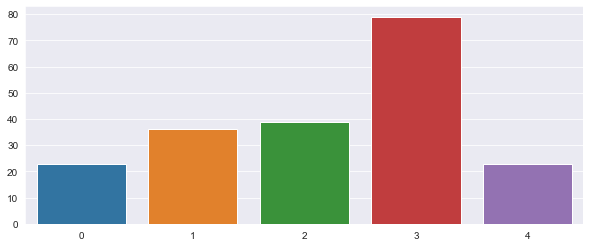

3    79
2    39
1    36
4    23
0    23
Name: Cluster, dtype: int64


In [15]:
sum_cluster = df.Cluster.value_counts()
#sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=sum_cluster.index, y=sum_cluster.values)
plt.show()
print(sum_cluster)

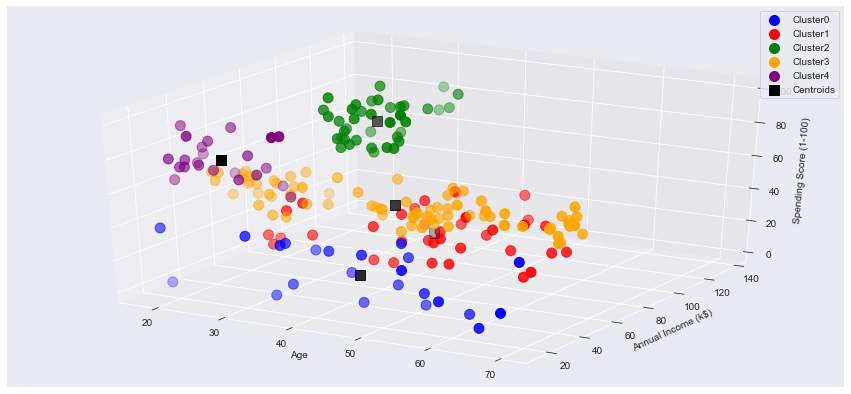

In [16]:
#Trực quan hóa phân cụm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income (k$)"][df.Cluster == 0], df["Spending Score (1-100)"][df.Cluster == 0], c='blue', s=100,label='Cluster0')
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income (k$)"][df.Cluster == 1], df["Spending Score (1-100)"][df.Cluster == 1], c='red', s=100,label='Cluster1')
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income (k$)"][df.Cluster == 2], df["Spending Score (1-100)"][df.Cluster == 2], c='green', s=100,label='Cluster2')
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income (k$)"][df.Cluster == 3], df["Spending Score (1-100)"][df.Cluster == 3], c='orange', s=100,label='Cluster3')
ax.scatter(df.Age[df.Cluster == 4], df["Annual Income (k$)"][df.Cluster == 4], df["Spending Score (1-100)"][df.Cluster == 4], c='purple', s=100,label='Cluster4')
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],km.cluster_centers_[:, 2], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [17]:
#Vị trí tâm của các cụm
np.round(km.cluster_centers_,1)

array([[45.2, 26.3, 20.9],
       [40.7, 87.8, 17.6],
       [32.7, 86.5, 82.1],
       [43.1, 55.3, 49.6],
       [25.5, 26.3, 78.6]])

In [18]:
#Tổng bình phương khoảng cách từ các mẫu tới trung tâm cụm gần nhất.
km.inertia_

75350.77917248776

# 3.Kết quả thu được
---
## Nhóm 0:

In [19]:
#Danh sách khách hàng nhóm 0
cluster_0 = df[df.Cluster== 0]
cluster_0.reset_index(inplace=True)
cluster_0[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,3,Female,20,16,6
2,5,Female,31,17,40
3,7,Female,35,18,6
4,9,Male,64,19,3
5,11,Male,67,19,14
6,13,Female,58,20,15
7,15,Male,37,20,13
8,17,Female,35,21,35
9,19,Male,52,23,29


In [20]:
#Đặc trưng thống kê của thuộc tính phân cụm khách hàng nhóm 0
cluster_0[['Age','Annual Income (k$)','Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,23.000000,23.000000,23.000000
mean,45.217391,26.304348,20.913043
std,13.228607,7.893811,13.017167
min,19.000000,15.000000,3.000000
25%,35.500000,19.500000,9.500000
50%,46.000000,25.000000,17.000000
75%,53.500000,33.000000,33.500000
max,67.000000,39.000000,40.000000


In [ ]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_0['Age'], cluster_0["Annual Income (k$)"], cluster_0["Spending Score (1-100)"], c='blue', s=100,label='Cluster1')
ax.scatter(km.cluster_centers_[0, 0], km.cluster_centers_[0, 1],km.cluster_centers_[0, 2], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

Nhóm 0: Gồm 39 khách hàng, nhóm có thu nhập hàng năm dải khá cao 69-137 k$, điểm chi tiêu cũng cao 63-97, độ tuổi trẻ từ 27-40 tuổi

## Nhóm 1
---

In [21]:
#Danh sách khách hàng nhóm 1
cluster_1=df[df.Cluster== 1]
cluster_1.reset_index(inplace=True)
print(cluster_1[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']])

    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0          125  Female   23                  70                      29
1          129    Male   59                  71                      11
2          131    Male   47                  71                       9
3          133  Female   25                  72                      34
4          135    Male   20                  73                       5
5          137  Female   44                  73                       7
6          139    Male   19                  74                      10
7          141  Female   57                  75                       5
8          145    Male   25                  77                      12
9          147    Male   48                  77                      36
10         149  Female   34                  78                      22
11         151    Male   43                  78                      17
12         153  Female   44                  78                 

In [22]:
#Đặc trưng thống kê của thuộc tính phân cụm khách hàng nhóm 1
print(cluster_1[['Age','Annual Income (k$)','Spending Score (1-100)']].describe())

             Age  Annual Income (k$)  Spending Score (1-100)
count  36.000000           36.000000               36.000000
mean   40.666667           87.750000               17.583333
std    11.496583           16.387059               10.204691
min    19.000000           70.000000                1.000000
25%    34.000000           77.000000               10.000000
50%    41.500000           83.000000               16.000000
75%    47.250000           97.250000               24.500000
max    59.000000          137.000000               39.000000


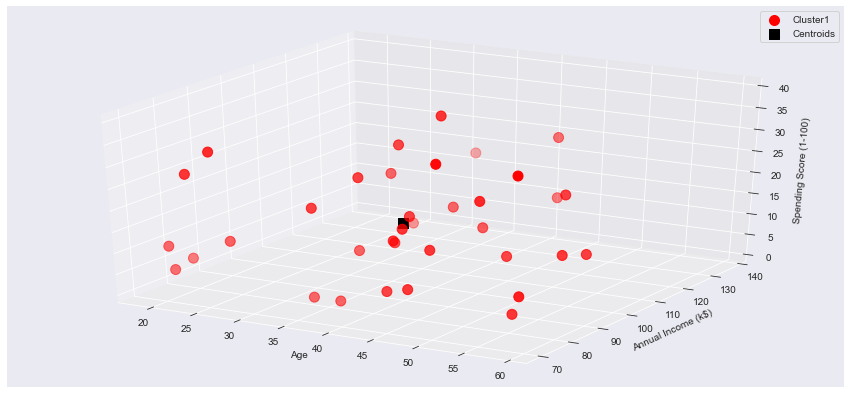

In [23]:
#Trực quan hóa
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_1["Age"], cluster_1["Annual Income (k$)"], cluster_1["Spending Score (1-100)"], c='red', s=100,label='Cluster1')
ax.scatter(km.cluster_centers_[1, 0], km.cluster_centers_[1, 1],km.cluster_centers_[1, 2], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

Nhóm 1: Gồm 79 khách hàng, là nhóm có thu nhập hàng năm trung bình (40-76) và điểm chi tiêu cũng trung bình (35-60), ko phân biệt độ tuổi

## Nhóm 2:
---

In [25]:
#Danh sách khách hàng nhóm 2
cluster_2 = df[df.Cluster== 2]
cluster_2.reset_index(inplace=True)
cluster_2[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)','Cluster']]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,124,Male,39,69,91,2
1,126,Female,31,70,77,2
2,128,Male,40,71,95,2
3,130,Male,38,71,75,2
4,132,Male,39,71,75,2
5,134,Female,31,72,71,2
6,136,Female,29,73,88,2
7,138,Male,32,73,73,2
8,140,Female,35,74,72,2
9,142,Male,32,75,93,2


In [26]:
#Đặc trưng thống kê của thuộc tính phân cụm khách hàng nhóm 2
print(cluster_2[['Age','Annual Income (k$)','Spending Score (1-100)']].describe())

             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
std     3.728650           16.312485                9.364489
min    27.000000           69.000000               63.000000
25%    30.000000           75.500000               74.500000
50%    32.000000           79.000000               83.000000
75%    35.500000           95.000000               90.000000
max    40.000000          137.000000               97.000000


In [ ]:
#Trực quan hóa nhóm 2
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_2["Age"], cluster_2["Annual Income (k$)"], cluster_2["Spending Score (1-100)"], c='green', s=100,label='Cluster2')
ax.scatter(km.cluster_centers_[2, 0], km.cluster_centers_[2, 1],km.cluster_centers_[2, 2], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

Nhóm 2: Gồm 36 khách hàng, là nhóm khách hàng có thu nhập hàng năm tương đối cao (70-137) nhưng điểm chi tiêu  thấp (<39), độ tuổi khách hàng chủ yếu ở 19-59 tuổi

## Nhóm 3:
---

In [27]:
#Danh sách khách hàng nhóm 2
cluster_3 = df[df.Cluster== 3]
cluster_3.reset_index(inplace=True)
cluster_3[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)','Cluster']]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,47,Female,50,40,55,3
1,48,Female,27,40,47,3
2,49,Female,29,40,42,3
3,50,Female,31,40,42,3
4,51,Female,49,42,52,3
...,...,...,...,...,...,...
74,121,Male,27,67,56,3
75,122,Female,38,67,40,3
76,123,Female,40,69,58,3
77,127,Male,43,71,35,3


In [28]:
#Đặc trưng thống kê của thuộc tính phân cụm khách hàng nhóm 3
print(cluster_3[['Age','Annual Income (k$)','Spending Score (1-100)']].describe())

             Age  Annual Income (k$)  Spending Score (1-100)
count  79.000000           79.000000               79.000000
mean   43.088608           55.291139               49.569620
std    16.478572            8.710665                6.242295
min    18.000000           40.000000               35.000000
25%    27.000000           48.000000               44.500000
50%    47.000000           54.000000               50.000000
75%    54.500000           62.000000               55.000000
max    70.000000           76.000000               60.000000


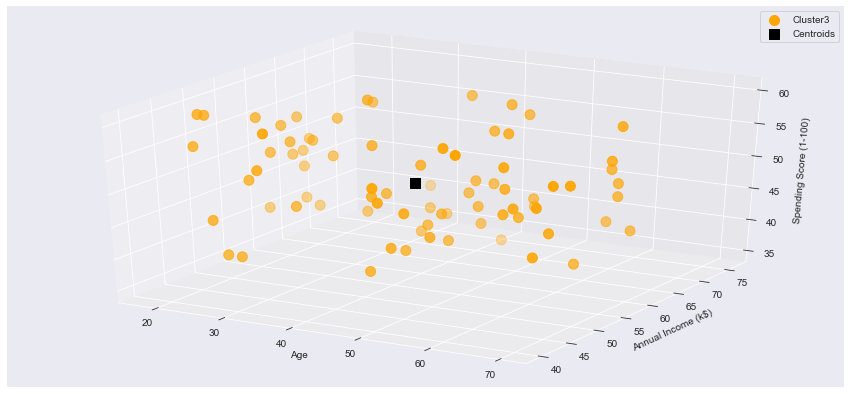

In [29]:
#Trực quan hóa nhóm 3
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_3['Age'], cluster_3["Annual Income (k$)"], cluster_3["Spending Score (1-100)"], c='orange', s=100,label='Cluster3')
ax.scatter(km.cluster_centers_[3, 0], km.cluster_centers_[3, 1],km.cluster_centers_[3, 2], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

Nhóm 3: Bao gồm 23 khách hàng, là những khách hàng có thu nhập hàng năm thấp và điểm chi tiêu cũng thấp, không giới hạn độ tuổi

## Nhóm 4:
---

In [30]:
#Danh sách khách hàng nhóm 4
cluster_4 = df[df.Cluster== 4]
cluster_4.reset_index(inplace=True)
cluster_4[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)','Cluster']]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,2,Male,21,15,81,4
1,4,Female,23,16,77,4
2,6,Female,22,17,76,4
3,8,Female,23,18,94,4
4,10,Female,30,19,72,4
5,12,Female,35,19,99,4
6,14,Female,24,20,77,4
7,16,Male,22,20,79,4
8,18,Male,20,21,66,4
9,20,Female,35,23,98,4


In [31]:
#Đặc trưng thống kê của thuộc tính phân cụm khách hàng nhóm 4
print(cluster_4[['Age','Annual Income (k$)','Spending Score (1-100)']].describe())

             Age  Annual Income (k$)  Spending Score (1-100)
count  23.000000           23.000000               23.000000
mean   25.521739           26.304348               78.565217
std     5.273170            7.893811               10.953729
min    18.000000           15.000000               61.000000
25%    21.500000           19.500000               73.000000
50%    24.000000           25.000000               77.000000
75%    30.000000           33.000000               84.500000
max    35.000000           39.000000               99.000000


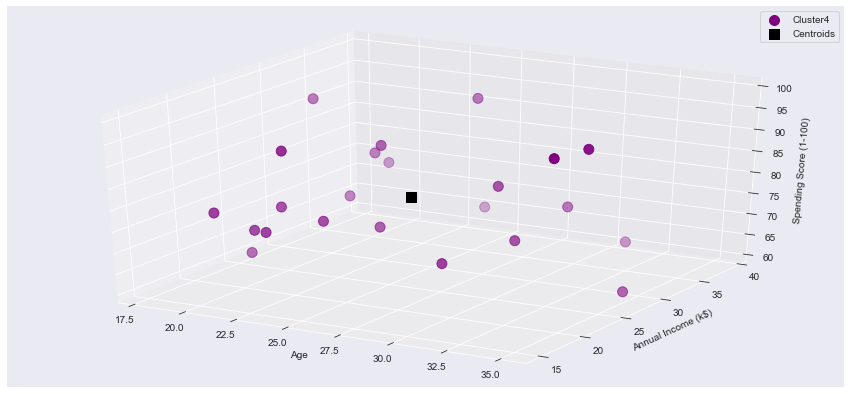

In [32]:
# Trực quan hóa nhóm 4
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_4['Age'], cluster_4["Annual Income (k$)"], cluster_4["Spending Score (1-100)"], c='purple', s=100,label='Cluster4')
ax.scatter(km.cluster_centers_[4, 0], km.cluster_centers_[4, 1],km.cluster_centers_[4, 2], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

Nhóm 4: Gồm 23 khách hàng, nhóm này bao gồm khách hàng trẻ (<35 tuổi), có mức thu nhập thấp (<39 k$) nhưng lại có điểm chi tiêu cao (>61)

Như vậy từ kết quả phân nhóm trên, trung tâm thương mại hoàn toàn đưa ra những chiến lược khuyến mại hoặc thu hút khách hàng riêng biệt phù hợp cho từng nhóm.


# THỰC HÀNH 1
---
Mô tả tập dữ liệu: Data_seles_Excercise.csv. Dữ liệu mua hàng của 200 MiniMart với một nhà phân phối hàng hóa trong năm 2019. Trong đó:
* Cột No: Mã của MiniMart
* Cột City: Ký hiệu khu vực đặt MiniMart
* Cột Distance: Khoảng cách từ MiniMart tới nhà phân phối.
* Cột Grocery: Số tiền MiniMart đã dùng để mua hàng tạp hóa trong năm 2019.
* Cột Milk: Số tiền mà MiniMart đã dùng để mua sữa từ nhà phân phối trong năm 2019

**YÊU CẦU:**
Sử dụng thuật toán phân cụm Kmeans cho tập dữ liệu với 2 thuộc tính phân cụm: Grocery, Milk:
1. Xác định số cụm tối ưu.
2. Thực hiện phân cụm dữ liệu với số cụm tối ưu đã chỉ ra ở yêu cầu 1. Trực quan hóa, Liệt kê danh sách MiniMart theo từng cụm và cho nhận xét.


In [2]:
#Đọc tập dữ liệu
path = "data/Data_sales_Excercise.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        200 non-null    int64 
 1   City      200 non-null    object
 2   Distance  200 non-null    int64 
 3   Grocery   200 non-null    int64 
 4   Milk      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.head()

,No,City,Distance,Grocery,Milk
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [4]:
df.describe()

,No,Distance,Grocery,Milk
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,46.155000,53620.500000,5954.375000
std,57.879185,17.492309,34855.146477,1777.210276
min,1.000000,19.000000,0.000000,2600.000000
25%,50.750000,30.000000,26575.000000,4550.000000
50%,100.500000,47.000000,46400.000000,5775.000000
75%,150.250000,63.000000,78225.000000,7431.250000
max,200.000000,75.000000,143500.000000,10075.000000


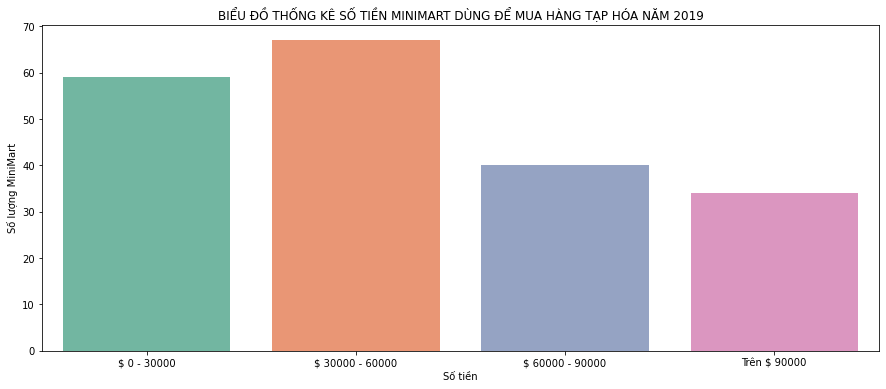

['$ 0 - 30000', '$ 30000 - 60000', '$ 60000 - 90000', 'Trên $ 90000']
[59, 67, 40, 34]


In [5]:
#Quan sát thuộc tính Grocery từ MiniMart
grocery1 = df.Grocery[(df.Grocery >= 0) & (df.Grocery <= 30000)]
grocery2 = df.Grocery[(df.Grocery >= 30000) & (df.Grocery <= 60000)]
grocery3 = df.Grocery[(df.Grocery >= 60000) & (df.Grocery <= 90000)]
grocery4 = df.Grocery[(df.Grocery > 90000)]
x_grocery = ["$ 0 - 30000","$ 30000 - 60000","$ 60000 - 90000","Trên $ 90000"]
y_grocery = [len(grocery1.values),len(grocery2.values),len(grocery3.values),len(grocery4.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x_grocery, y=y_grocery, palette="Set2")
plt.title("BIỂU ĐỒ THỐNG KÊ SỐ TIỀN MINIMART DÙNG ĐỂ MUA HÀNG TẠP HÓA NĂM 2019")
plt.xlabel("Số tiền")
plt.ylabel("Số lượng MiniMart")
plt.show()
print(x_grocery)
print(y_grocery)

Như vậy có khoảng 67 MiniMart bỏ ra khoảng 30-60 nghìn đô để mua hàng tạp hóa từ nhà cung cấp chiếm phần lớn trên tổng 200 MiniMart. Xếp sau là 59 MiniMart bỏ ra khoảng từ 0-30 nghìn đô, và sau nữa là 40 MiniMart bỏ ra khoảng 60-90 nghìn đô. Cuối cùng là 34 MiniMart bỏ ra khoảng trên 90 nghìn đô

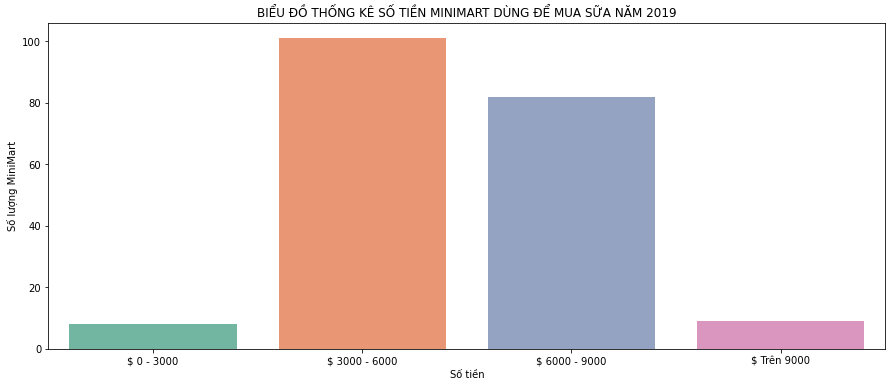

['$ 0 - 3000', '$ 3000 - 6000', '$ 6000 - 9000', '$ Trên 9000']
[8, 101, 82, 9]


In [6]:
#Quan sát thuộc tính Milk từ MiniMart
milk_1 = df.Milk[(df.Milk >= 0) & (df.Milk <= 3000)]
milk_2 = df.Milk[(df.Milk >= 3000) & (df.Milk <= 6000)]
milk_3 = df.Milk[(df.Milk >= 6000) & (df.Milk <= 9000)]
milk_4 = df.Milk[(df.Milk > 9000)]

x_milk = ["$ 0 - 3000","$ 3000 - 6000","$ 6000 - 9000","$ Trên 9000"]
y_milk = [len(milk_1.values),len(milk_2.values),len(milk_3.values),len(milk_4.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x_milk, y=y_milk, palette="Set2")
plt.title("BIỂU ĐỒ THỐNG KÊ SỐ TIỀN MINIMART DÙNG ĐỂ MUA SỮA NĂM 2019")
plt.xlabel("Số tiền")
plt.ylabel("Số lượng MiniMart")
plt.show()
print(x_milk)
print(y_milk)

Từ biểu đồ trên ta thấy số lượng các MiniMart mua sữa với số tiền khoảng 3-6 nghìn đô chiếm tỉ lệ cao nhất với 101/200 chiếm 50% các MiniMart còn lại và ít nhất là số tiền từ 0-3 nghìn đô và trên 9 nghìn đô chiếm 8.5% trên tổng số 200 MiniMart

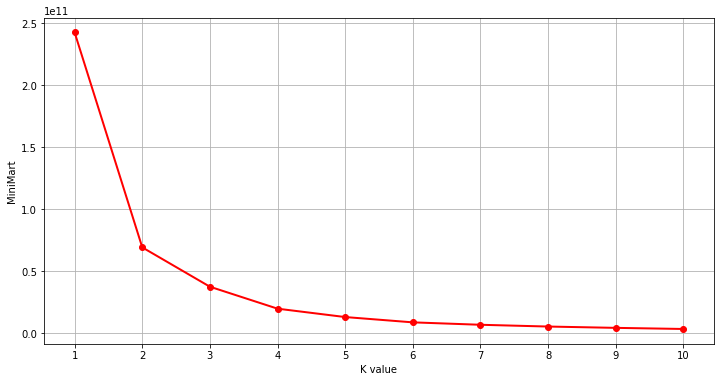

In [7]:
#Áp dụng phương pháp khửu tay để tìm số cụm
from sklearn.cluster import KMeans

#Thử số cụm
miniMart=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df.iloc[:,2:])# fit các cột index 2 trở đi
    miniMart.append(kmeans.inertia_)
    
#Trực quan hóa
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(range(1,11),miniMart,linewidth=2, color="red", marker="o")
plt.xlabel("K value")
plt.ylabel("MiniMart")
plt.xticks(np.arange(1,11,1))#chạy từ 1- 11 với bước nhảy 3 là 1
plt.show()

In [8]:
# tạo biến model để train với cột 2 của df trở đi
model = df.iloc[:,2:]

Dựa vào biểu đồ thì số cụm tối ưu nhất k=4

In [9]:
#Thực hiện phân thành 4 cụm
km = KMeans(n_clusters=4,n_init=10,max_iter=300, tol=0.0001, random_state= 111, algorithm='elkan')
km.fit_predict(model)

#Tạo cột cluster để cho biết mẫu thuộc cụm nào
df['Cluster'] = km.labels_
df

,No,City,Distance,Grocery,Milk,Cluster
0,1,K,60,69900,6325,0
1,2,K,30,79000,5200,0
2,3,E,52,85500,7825,0
3,4,E,57,17100,8375,1
4,5,E,55,5500,5450,1
...,...,...,...,...,...,...
195,196,E,22,96600,7900,0
196,197,E,39,83700,7675,0
197,198,K,25,34000,4000,3
198,199,K,30,42000,5500,3


In [52]:
#convert to numnpy
customer = df.to_numpy()
customer

array([[1, 'K', 60, 69900, 6325, 0],
       [2, 'K', 30, 79000, 5200, 0],
       [3, 'E', 52, 85500, 7825, 0],
       ...,
       [198, 'K', 25, 34000, 4000, 3],
       [199, 'K', 30, 42000, 5500, 3],
       [200, 'K', 23, 47600, 4150, 3]], dtype=object)

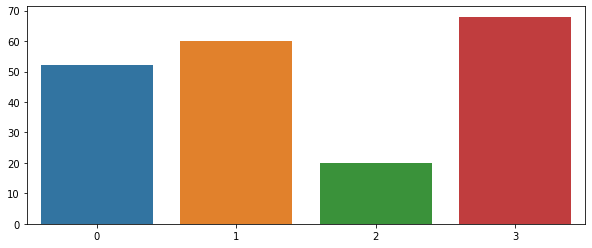

3    68
1    60
0    52
2    20
Name: Cluster, dtype: int64


In [47]:
sum_cluster = df.Cluster.value_counts()
#sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=sum_cluster.index, y=sum_cluster.values)
plt.show()
print(sum_cluster)

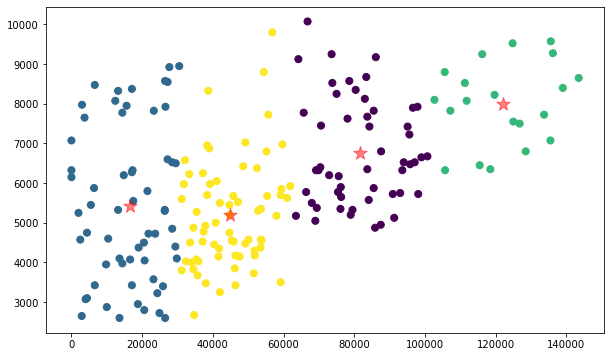

In [67]:
#vẽ biểu đồ phân tán dữ liệu
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:,3],df.iloc[:,4],c= km.labels_,s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:,1], centers[:,2], c='red', s=200,alpha=0.5,marker='*')   
plt.show()

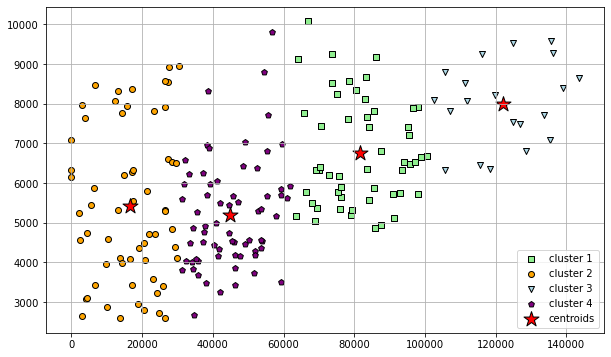

In [68]:
# vẽ biểu đồ phân cụm thể hiện sự phân tán của dữ liệu
plt.figure(figsize=(10, 6))
plt.scatter(
    customer[df.Cluster == 0, 3],
    customer[df.Cluster == 0, 4],
    c = 'lightgreen', #màu
    marker = 's',     #kí hiệu s = square
    edgecolor = 'black', #boder
    label = 'cluster 1' #tên nhãn
)
plt.scatter(
    customer[df.Cluster == 1, 3],
    customer[df.Cluster == 1, 4],
    c = 'orange',
    marker = 'o',
    edgecolor = 'black',
    label = 'cluster 2'
)
plt.scatter(
    customer[df.Cluster == 2, 3],
    customer[df.Cluster == 2, 4],
    c = 'lightblue',
    marker = 'v',
    edgecolor = 'black',
    label = 'cluster 3'
)
plt.scatter(
    customer[df.Cluster == 3, 3],
    customer[df.Cluster == 3, 4],
    c = 'purple',
    marker = 'p',
    edgecolor = 'black',
    label = 'cluster 4'
)
plt.scatter(
    km.cluster_centers_[:, 1],
    km.cluster_centers_[:, 2],
    s=250,
    marker = '*',
    c = 'red',
    edgecolor = 'black',
    label = 'centroids'
)
plt.legend(scatterpoints=1) # chú thích
plt.grid()
plt.show()

### Nhóm 0:

In [36]:
#Danh sách khách hàng nhóm 0
cluster_0 = df[df.Cluster== 0]
cluster_0.reset_index(inplace=True)
cluster_0[['No','City','Distance','Grocery','Milk']]

,No,City,Distance,Grocery,Milk
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,8,E,20,69000,5050
4,12,E,21,95800,6475
5,15,K,68,83000,8125
6,17,E,72,91300,5125
7,19,K,26,79500,5325
8,20,E,60,66400,5775
9,23,E,41,90900,5725


In [38]:
cluster_0[['Grocery','Milk']].describe()

,Grocery,Milk
count,52.000000,52.000000
mean,81588.461538,6765.384615
std,10691.093120,1322.552807
min,63500.000000,4875.000000
25%,73425.000000,5725.000000
50%,81700.000000,6437.500000
75%,91000.000000,7787.500000
max,100700.000000,10075.000000


#### Nhận xét:
Nhóm 0 có 51 MiniMart tỷ lệ mua hàng tạp hóa và sữa ở mức trung bình với hàng tạp hóa là 81 nghìn đô và sữa là 6 nghìn đô

### Nhóm 1:

In [39]:
#Danh sách khách hàng nhóm 1
cluster_1 = df[df.Cluster== 1]
cluster_1.reset_index(inplace=True)
cluster_1[['No','City','Distance','Grocery','Milk']]

,No,City,Distance,Grocery,Milk
0,4,E,57,17100,8375
1,5,E,55,5500,5450
2,6,E,68,27200,8550
3,7,E,41,20500,4500
4,9,K,33,13200,8325
5,14,E,46,29800,4100
6,18,K,20,9800,3950
7,21,K,49,25900,3400
8,22,K,22,0,7075
9,27,E,66,26400,5325


In [40]:
cluster_1[['Grocery','Milk']].describe()

,Grocery,Milk
count,60.000000,60.000000
mean,16483.333333,5422.916667
std,9337.098716,1943.994946
min,0.000000,2600.000000
25%,9000.000000,3968.750000
50%,17100.000000,5275.000000
75%,25150.000000,6718.750000
max,30500.000000,8950.000000


#### Nhận xét: 
Nhóm 1 có 59 MiniMart phần khúc mua hàng tạp hóa rất là thấp trung bình chỉ là 16 nghìn đô còn mua hàng sữa ở mức trung bình với trên 5 nghìn đô

### Nhóm 2:

In [41]:
#Danh sách khách hàng nhóm 2
cluster_2 = df[df.Cluster== 2]
cluster_2.reset_index(inplace=True)
cluster_2[['No','City','Distance','Grocery','Milk']]

,No,City,Distance,Grocery,Milk
0,16,K,35,143500,8650
1,25,E,56,126800,7500
2,40,E,66,111300,8525
3,41,E,51,102700,8100
4,50,E,63,118500,6350
5,53,E,60,105600,8800
6,54,K,55,139000,8400
7,61,K,70,125000,7550
8,77,E,28,107200,7825
9,85,E,68,135500,7075


In [42]:
cluster_2[['Grocery','Milk']].describe()

,Grocery,Milk
count,20.000000,20.00000
mean,122140.000000,8000.00000
std,12517.078859,1034.75779
min,102700.000000,6325.00000
25%,111675.000000,7393.75000
50%,122250.000000,8087.50000
75%,134150.000000,8687.50000
max,143500.000000,9575.00000


#### Nhận xét:
Nhóm 2 có 19 MiniMart rất ít Nhưng phần khúc mua hàng tạp hóa của các MiniMart này lại rất cao trên 120 nghìn đô và đối với sữa cũng khá cao khoảng 8 nghìn đô => là đối tượng tiềm năng :V

### Nhóm 3:

In [43]:
#Danh sách khách hàng nhóm 3
cluster_3 = df[df.Cluster== 3]
cluster_3.reset_index(inplace=True)
cluster_3[['No','City','Distance','Grocery','Milk']]

,No,City,Distance,Grocery,Milk
0,10,E,37,31800,5975
1,11,K,33,59200,5700
2,13,E,48,46200,3850
3,24,K,30,51800,4300
4,26,K,56,40800,5000
...,...,...,...,...,...
63,191,E,57,44700,5450
64,193,K,74,39200,5975
65,198,K,25,34000,4000
66,199,K,30,42000,5500


In [44]:
cluster_3[['Grocery','Milk']].describe()

,Grocery,Milk
count,68.000000,68.000000
mean,44848.529412,5201.470588
std,8856.863308,1352.891337
min,31200.000000,2675.000000
25%,37350.000000,4175.000000
50%,44750.000000,4962.500000
75%,52575.000000,5937.500000
max,61900.000000,9800.000000


#### Nhận xét: 
nhóm 03 có 67 MiniMart đông nhất trong các nhóm nhưng tỉ lệ mua hàng lại dưới mức trung bình khoảng 44 nghìn đô cho hàng tạp hóa và với sữa thì ở mức trung bình khoảng 5 nghìn đô